In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib.ticker as ticker
import numpy as np

In [2]:
df = pd.read_excel("Sales by Product.xlsx")
df.head()

,Code,Type,Name,Units Sold,Purchased_Price_Sum,Sold_Price_Sum,Margin
0,1420439,آرايشي بهداشتي,سينره شامپو پروتئينه جوانه گندم,2.0,1217392.0,1400000.0,182608.0
1,1421236,آرايشي بهداشتي,فیروز پودر بچه با زینک اکساید 200 گرمي,1.0,286087.0,329000.0,42913.0
2,1421345,آرايشي بهداشتي,TENABED 60*90 sun pad,92.0,36942000.0,44504000.0,7562000.0
3,1421676,آرايشي بهداشتي,سلنيوم سولفايد 1% شامپو ايران,10.0,2542370.0,3000000.0,457630.0
4,1422926,آرايشي بهداشتي,مديلن لوسيون بدن,2.0,1728038.0,1986250.0,258212.0


In [3]:
df1 = df.groupby('Code').sum().fillna(0).sort_values('Margin',ascending=False).reset_index()
df1 = df1.iloc[0:21]
df1

,Code,Type,Name,Units Sold,Purchased_Price_Sum,Sold_Price_Sum,Margin
0,1438593,دارو,MASPORT 500 iu VIAL,2001.0,8.363678e+09,9.535165e+09,1.171487e+09
1,1442542,دارو,DYSTON 500 IU/VIAL,1223.0,5.112140e+09,5.827840e+09,7.156996e+08
2,1441702,دارو,CATOSIN 250 INHALANT RESPIRATORY 250 ug/1{dose...,217.0,1.271172e+08,6.865032e+08,5.593860e+08
3,1442982,دارو,XOBOX CAP HI HEALTH,31209.0,8.883808e+08,1.224641e+09,3.362603e+08
4,1443010,دارو,CUTS 3 SUPPLAND NUTRITION 60 CAPSULE,19089.0,1.869538e+09,2.204385e+09,3.348478e+08
5,1440751,دارو,PERGOVERIS® FOLLITROPIN ALFA/LUTROPIN ALFA 150,343.0,3.095295e+09,3.342878e+09,2.475825e+08
6,1442746,دارو,REDOXYFER 500MG/10ML 50MG IRON/ML,77.0,5.917450e+08,8.348120e+08,2.430670e+08
7,1412928,دارو,LIDOCAIEN 2% 5ML AMP,17054.0,1.196581e+09,1.436116e+09,2.395353e+08
8,1439597,دارو,NEURONOX VIAL 200,95.0,2.649252e+09,2.887686e+09,2.384344e+08
9,1442239,دارو,BONE FIT XMART TAB,22091.0,8.488603e+08,1.074405e+09,2.255443e+08


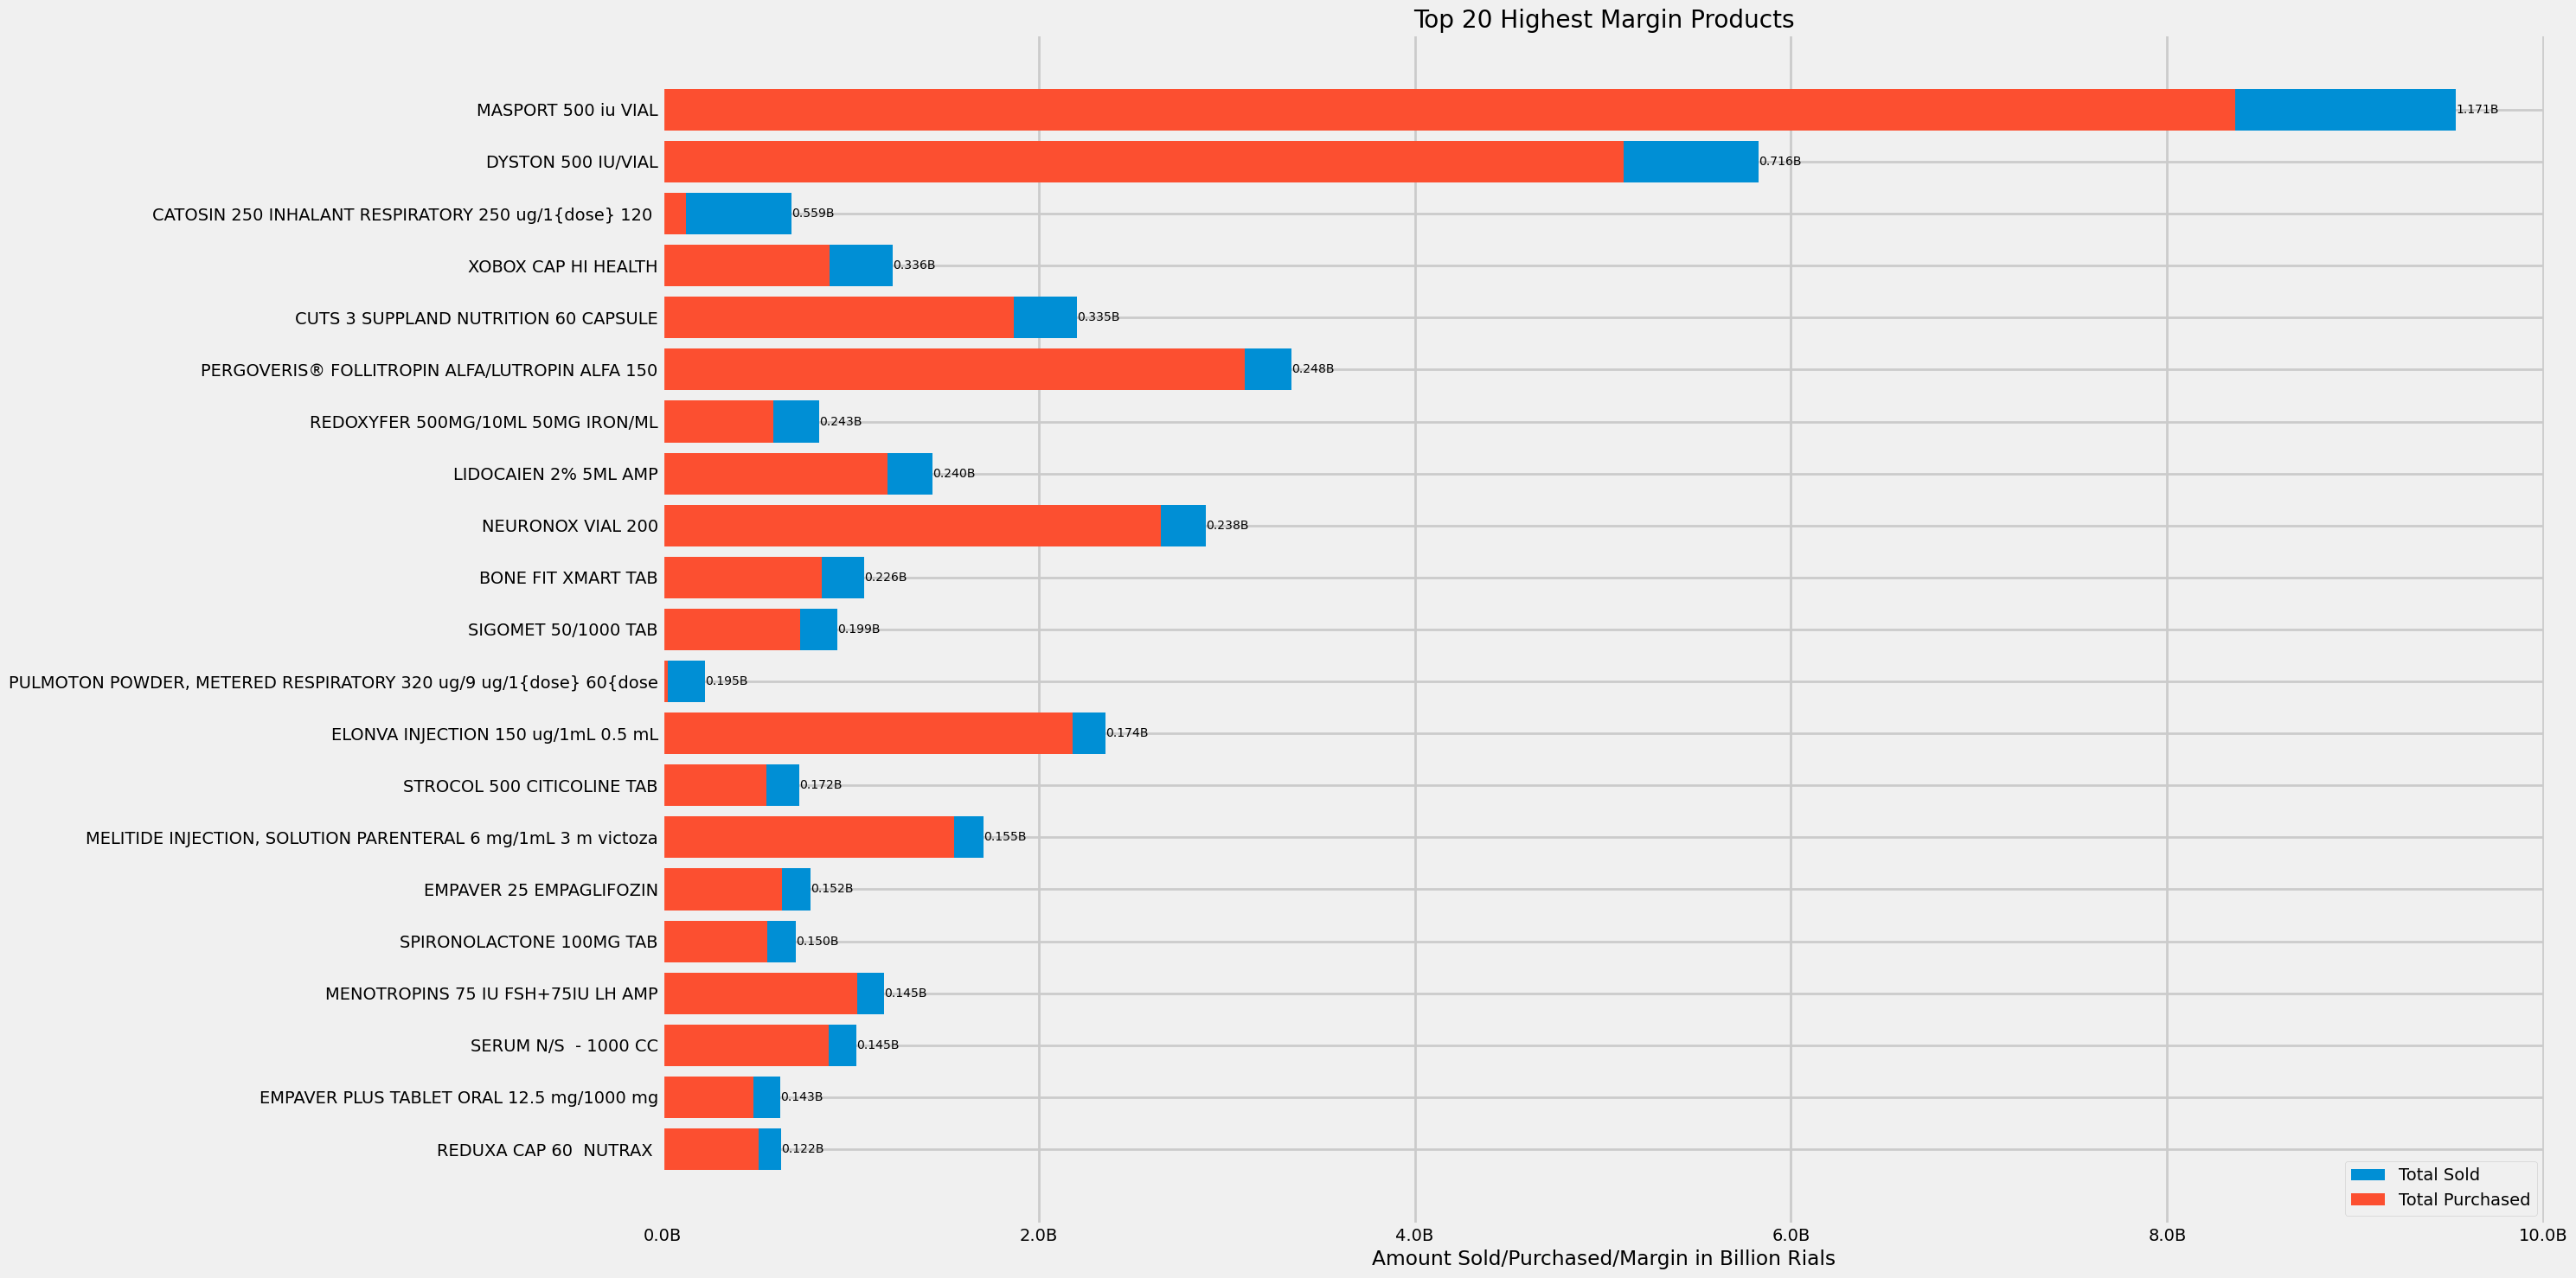

In [4]:
plt.style.use('fivethirtyeight')
fig, (ax1) = plt.subplots(nrows=1,ncols=1,figsize=(30, 15),sharey=True)
width = 0.25
y_indexes = np.arange(len(df1))[::-1]
y_indexes

sold_bars = ax1.barh(y_indexes, df1['Sold_Price_Sum'], label='Total Sold')
purchased_bars = ax1.barh(y_indexes, df1['Purchased_Price_Sum'], label='Total Purchased')

formatter = ticker.FuncFormatter(lambda y, pos: '{:.1f}B'.format(y / 1e9))
ax1.xaxis.set_major_formatter(formatter)
ax1.set_title('Top 20 Highest Margin Products')
ax1.set_xlabel('Amount Sold/Purchased/Margin in Billion Rials')
ax1.set_yticks(range(len(df1['Name']))[::-1])
ax1.set_yticklabels(list(df1['Name']))
ax1.legend()

for i, bar in enumerate(sold_bars):
    ax1.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, f'{df1["Margin"].iloc[i] / 1e9:.3f}B', ha='left', va='center', fontsize=10)


# Formatting x-axis to display values in billion scale
formatter = ticker.FuncFormatter(lambda y, pos: '{:.1f}B'.format(y / 1e9))
ax1.xaxis.set_major_formatter(formatter)


plt.grid(linestyle='-', linewidth=2)
plt.tight_layout()
plt.savefig('Products.png')
plt.show()

In [5]:
df.head()

,Code,Type,Name,Units Sold,Purchased_Price_Sum,Sold_Price_Sum,Margin
0,1420439,آرايشي بهداشتي,سينره شامپو پروتئينه جوانه گندم,2.0,1217392.0,1400000.0,182608.0
1,1421236,آرايشي بهداشتي,فیروز پودر بچه با زینک اکساید 200 گرمي,1.0,286087.0,329000.0,42913.0
2,1421345,آرايشي بهداشتي,TENABED 60*90 sun pad,92.0,36942000.0,44504000.0,7562000.0
3,1421676,آرايشي بهداشتي,سلنيوم سولفايد 1% شامپو ايران,10.0,2542370.0,3000000.0,457630.0
4,1422926,آرايشي بهداشتي,مديلن لوسيون بدن,2.0,1728038.0,1986250.0,258212.0


In [6]:
df2 = df.groupby('Type').sum().fillna(0).sort_values('Margin',ascending=False).drop('Code',axis=1).reset_index()
df2['Type'] = [
    "Medicine",
    "Hygienic Cosmetic",
    "Medical Equipment and Orthopedics",
    "Other",
    "Other",
    "Other"
]
df2 = df2.groupby('Type').sum().sort_values('Margin',ascending=False).reset_index()
df2

,Type,Name,Units Sold,Purchased_Price_Sum,Sold_Price_Sum,Margin
0,Medicine,PARAKID ACETAMINOPHEN DROPACETAMINOPHEN 125MG ...,1667594.0,8.892308e+10,1.063998e+11,1.747670e+10
1,Hygienic Cosmetic,سينره شامپو پروتئينه جوانه گندمفیروز پودر بچه...,16841.4,5.841109e+09,6.950072e+09,1.108964e+09
2,Medical Equipment and Orthopedics,گردنبند نيه سخت طب و صنعت S + M + L + XL + XXL...,16859.0,1.529664e+09,2.011986e+09,4.823212e+08
3,Other,RESORCINOL_RESORCIN_BULKVASELINE_ BULKEOSIN PO...,7382.4,2.385559e+08,3.109138e+08,7.235796e+07


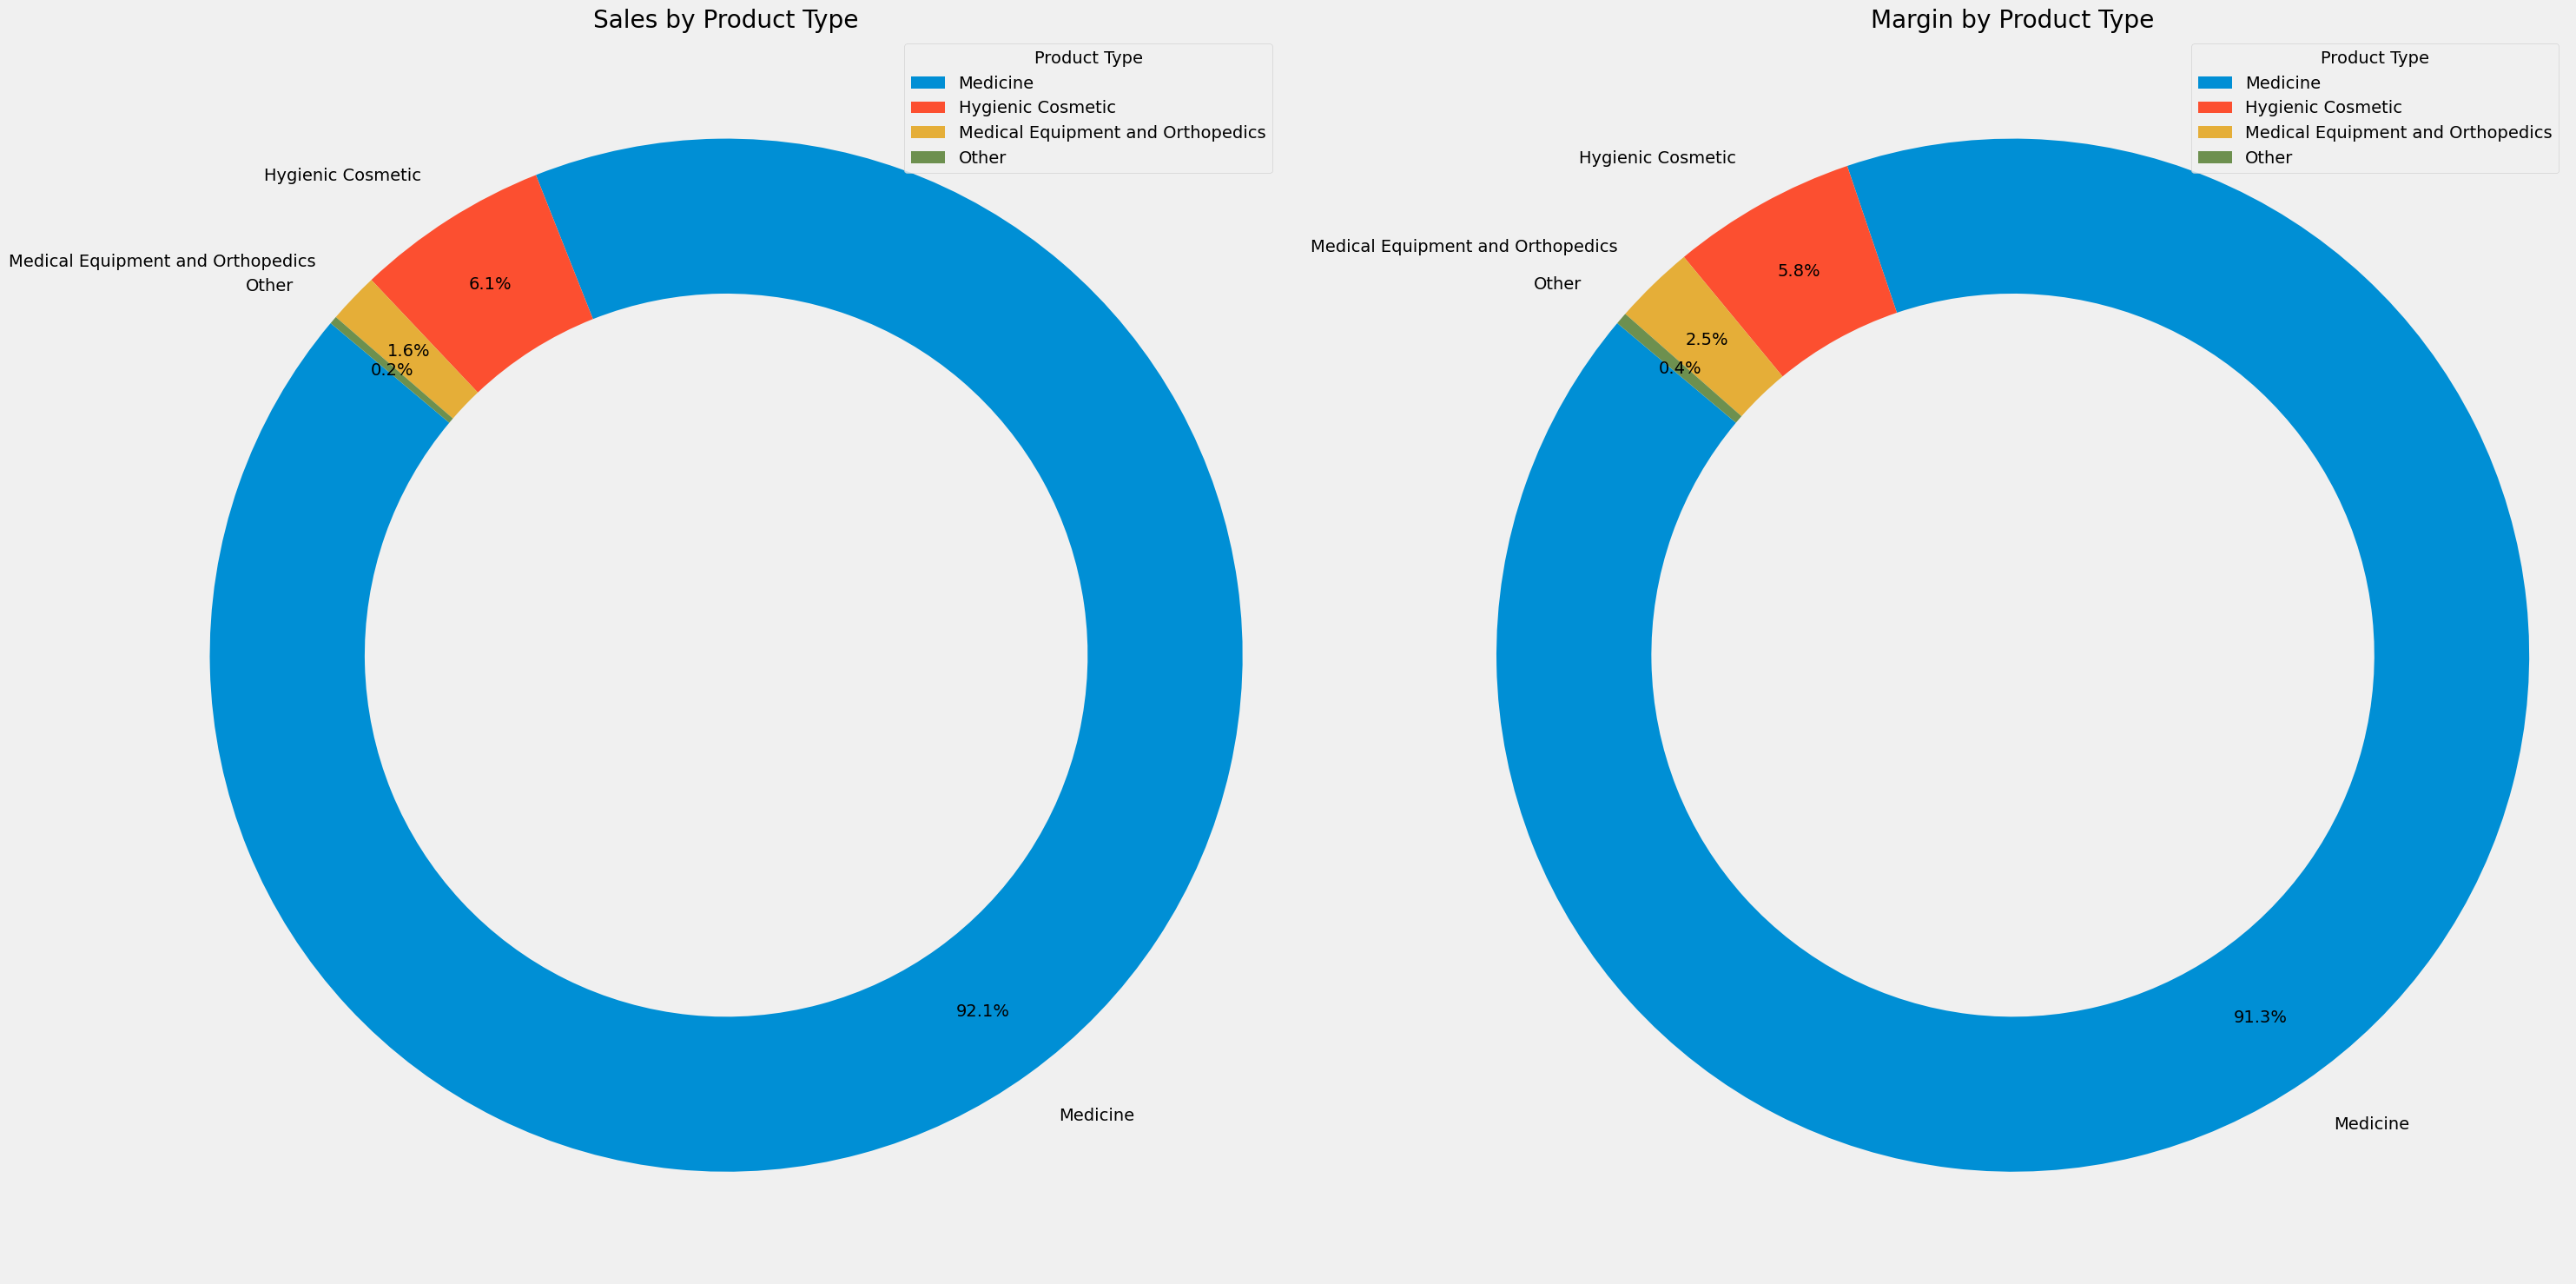

In [7]:
plt.style.use('fivethirtyeight')
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(30, 15))

# Calculate explode values to make every slice bigger except the largest one
sizes1 = df2['Purchased_Price_Sum']
max_size1 = max(sizes1)

sizes2 = df2['Margin']
max_size2 = max(sizes2)

# Define function to handle wedgeprops based on size
def get_wedgeprops(sizes, max_size):
    wedgeprops = {}
    for s in sizes:
        if s != max_size:
            wedgeprops['width'] = 0.3
        else:
            wedgeprops['width'] = 0.1
    return wedgeprops

# Get wedgeprops for pie chart 1
wedgeprops1 = get_wedgeprops(sizes1, max_size1)

# Get wedgeprops for pie chart 2
wedgeprops2 = get_wedgeprops(sizes2, max_size2)

# Plotting pie charts with modified wedgeprops to make slices bigger
ax1.pie(sizes1, labels=df2['Type'], autopct='%1.1f%%', startangle=140, wedgeprops=wedgeprops1, pctdistance=0.85)
ax2.pie(sizes2, labels=df2['Type'], autopct='%1.1f%%', startangle=140, wedgeprops=wedgeprops2, pctdistance=0.85)

# Adding legends
ax1.legend(df2['Type'], loc='upper right', title='Product Type')
ax2.legend(df2['Type'], loc='upper right', title='Product Type')

# Setting titles and making the aspect ratio equal
ax1.set_title('Sales by Product Type')
ax2.set_title('Margin by Product Type')
ax1.axis('equal')
ax2.axis('equal')
plt.tight_layout()
plt.savefig('Types.png')
plt.show()